## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_17-27-04-23.csv', firstRow=318, lastRow=324)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_180423_S319-324.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=86s and ended at t=514s; mass=44.178749999999994g
This equals a volume of 44.267m; expected was 44.325mL; error is 0.131%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00041666666666666675 g/s^2


<IPython.core.display.Javascript object>


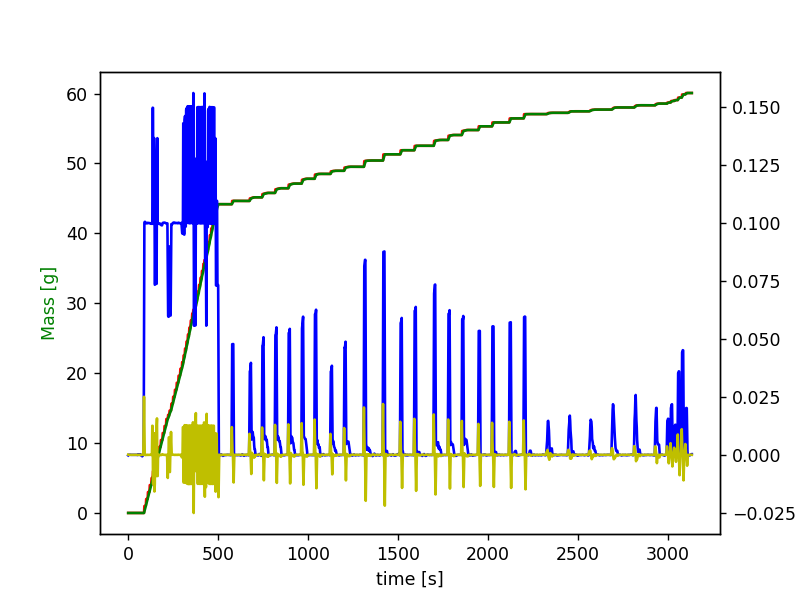

Addition of 0.476g Texapon SB 3 KC detected from 572s to 592s - expected volume = 0.921mL and actual volume = 0.43mL (resulting error is 53.34%)
Addition of 0.516g Plantapon LC 7 detected from 670s to 710s - expected volume = 0.536mL and actual volume = 0.486mL (resulting error is 9.244%)
Addition of 0.63g Plantapon LC 7 detected from 740s to 784s - expected volume = 0.536mL and actual volume = 0.594mL (resulting error is 10.808%)
Addition of 0.671g Plantapon LC 7 detected from 812s to 856s - expected volume = 0.558mL and actual volume = 0.626mL (resulting error is 12.174%)
Addition of 0.668g Plantapon LC 7 detected from 886s to 930s - expected volume = 0.558mL and actual volume = 0.624mL (resulting error is 11.739%)
Addition of 0.694g Plantapon LC 7 detected from 960s to 1000s - expected volume = 0.586mL and actual volume = 0.657mL (resulting error is 12.036%)
Addition of 0.7g Plantapon LC 7 detected from 1032s to 1072s - expected volume = 0.586mL and actual volume = 0.663mL (resultin

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00041666666666666675 g/s^2


<IPython.core.display.Javascript object>


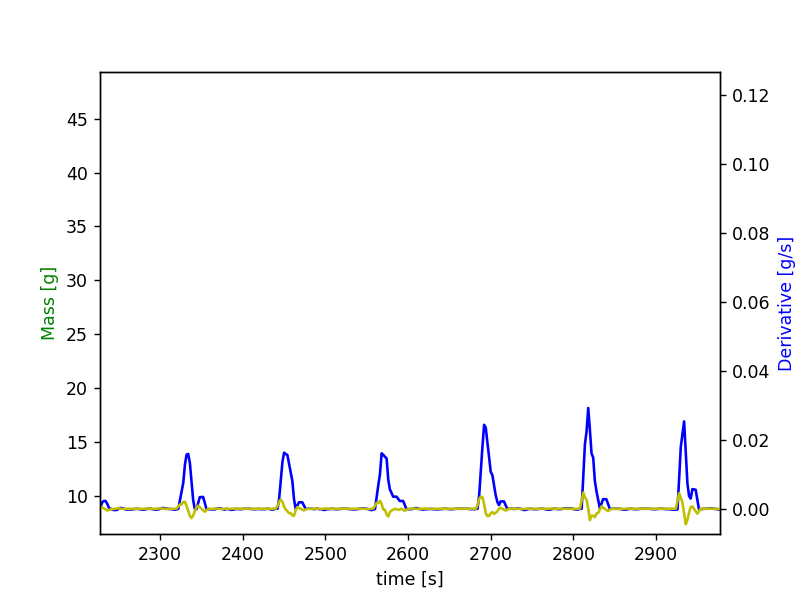

Addition of 0.191g Dehyquart CC7 Benz detected from 2320s to 2360s - expected volume = 0.199mL and actual volume = 0.188mL (resulting error is 5.384%)
Addition of 0.228g Dehyquart CC7 Benz detected from 2440s to 2478s - expected volume = 0.207mL and actual volume = 0.222mL (resulting error is 7.547%)
Addition of 0.241g Dehyquart CC7 Benz detected from 2558s to 2600s - expected volume = 0.197mL and actual volume = 0.24mL (resulting error is 21.97%)
Addition of 0.313g Dehyquart CC7 Benz detected from 2682s to 2722s - expected volume = 0.262mL and actual volume = 0.309mL (resulting error is 17.972%)
Addition of 0.32g Dehyquart CC7 Benz detected from 2808s to 2846s - expected volume = 0.254mL and actual volume = 0.316mL (resulting error is 24.225%)
Addition of 0.245g Dehyquart CC7 Benz detected from 2924s to 2956s - expected volume = 0.171mL and actual volume = 0.243mL (resulting error is 42.297%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.00125 g/s^2


<IPython.core.display.Javascript object>


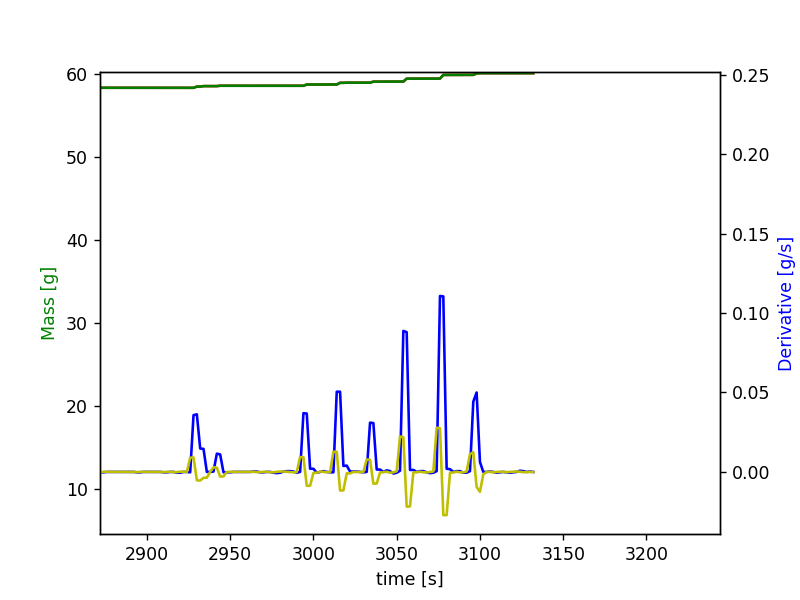

Addition of 0.154g Arlypon F detected from 2990s to 3002s - expected volume = 0.17mL and actual volume = 0.175mL (resulting error is 2.667%)
Addition of 0.217g Arlypon F detected from 3010s to 3022s - expected volume = 0.229mL and actual volume = 0.244mL (resulting error is 6.897%)
Addition of 0.129g Arlypon F detected from 3030s to 3042s - expected volume = 0.134mL and actual volume = 0.148mL (resulting error is 10.256%)
Addition of 0.357g Arlypon F detected from 3050s to 3062s - expected volume = 0.392mL and actual volume = 0.408mL (resulting error is 4.082%)
Addition of 0.449g Arlypon F detected from 3072s to 3084s - expected volume = 0.489mL and actual volume = 0.51mL (resulting error is 4.302%)
Addition of 0.2g Arlypon F detected from 3092s to 3106s - expected volume = 0.203mL and actual volume = 0.23mL (resulting error is 13.277%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_180423_S319-S324.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_8048\4247032350.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
318,319.0,0.00000,0.0,11.364540,0.000000,0.000000,0.000000,0.000000,0.000000,10.796759,0.0,0.0,0.00000,0.0,0.0,1.893842,0.0,1.525974,0.0
319,320.0,0.00000,0.0,13.126858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.72496,0.0,0.0,2.235193,0.0,2.127355,0.0
320,321.0,4.94189,0.0,0.000000,0.000000,0.000000,9.242703,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,2.505177,0.0,1.338169,0.0
321,322.0,0.00000,0.0,13.577248,10.000493,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,3.045990,0.0,3.478348,0.0
322,323.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,12.275642,8.373584,0.000000,0.0,0.0,0.00000,0.0,0.0,3.213283,0.0,4.496590,0.0
323,324.0,0.00000,0.0,0.000000,0.000000,8.785527,0.000000,0.000000,13.945436,0.000000,0.0,0.0,0.00000,0.0,0.0,2.391833,0.0,1.959397,0.0
